In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv("Dataset of Diabetes .csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [5]:
df.shape

(1000, 14)

In [6]:
df.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [7]:
df1 = df.drop(['ID', 'No_Pation', 'Gender', 'CLASS'], axis=1)
df1.corr()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
AGE,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956
Urea,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618
Cr,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746
HbA1c,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350
Chol,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678
TG,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757
HDL,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409
LDL,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322
VLDL,-0.087903,-0.011191,0.009615,0.073462,0.076294,0.144570,-0.059275,0.062795,1.000000,0.198133
BMI,0.375956,0.045618,0.054746,0.413350,0.013678,0.110757,0.072409,-0.067322,0.198133,1.000000


<Axes: >

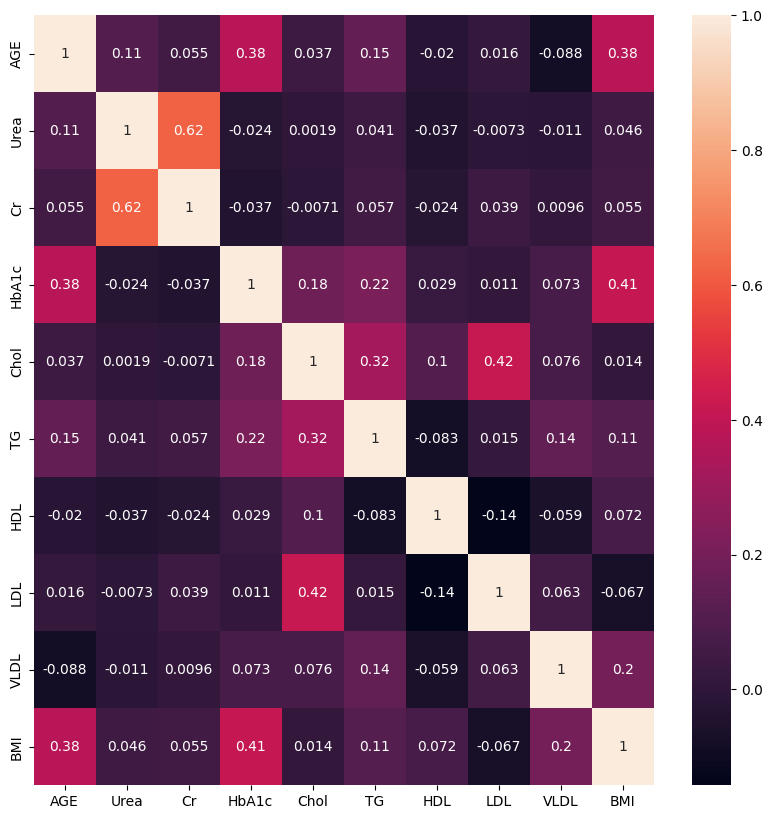

In [8]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot = True)

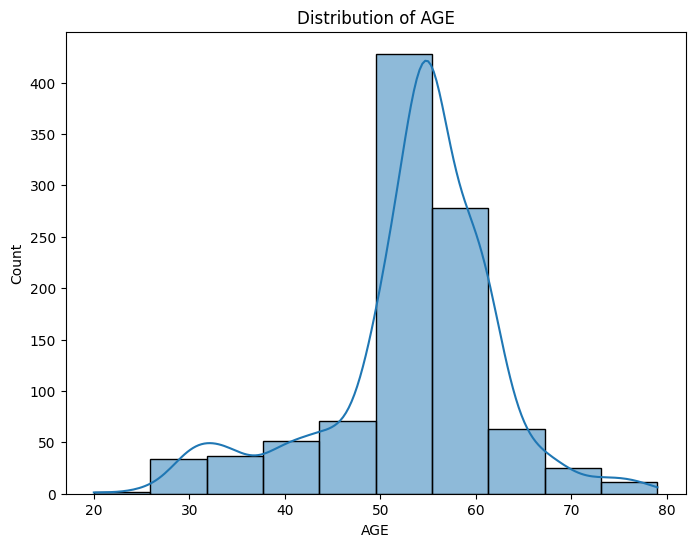

In [9]:
# Plot AGE distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], bins=10, kde=True)
plt.title('Distribution of AGE')
plt.show()

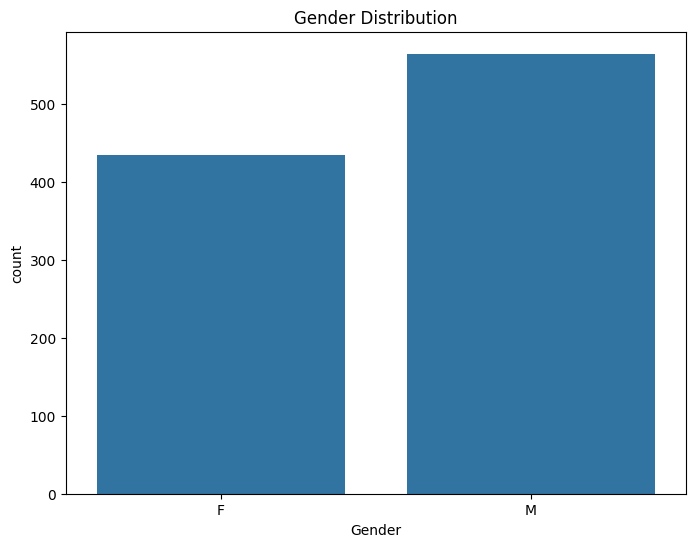

In [10]:
# Plot Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

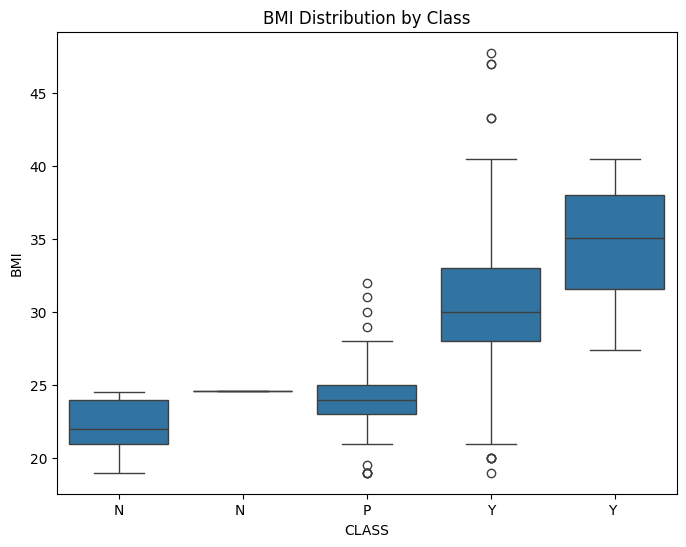

In [11]:
# Plot BMI distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='CLASS', y='BMI', data=df)
plt.title('BMI Distribution by Class')
plt.show()

In [12]:
X = df1
y = df['CLASS']

In [13]:
X.shape

(1000, 10)

In [14]:
y.shape

(1000,)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)


In [17]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (800, 10) (800,)
Test Set:  (200, 10) (200,)


In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

Training Accuracy: 0.9975
Test Accuracy: 0.98


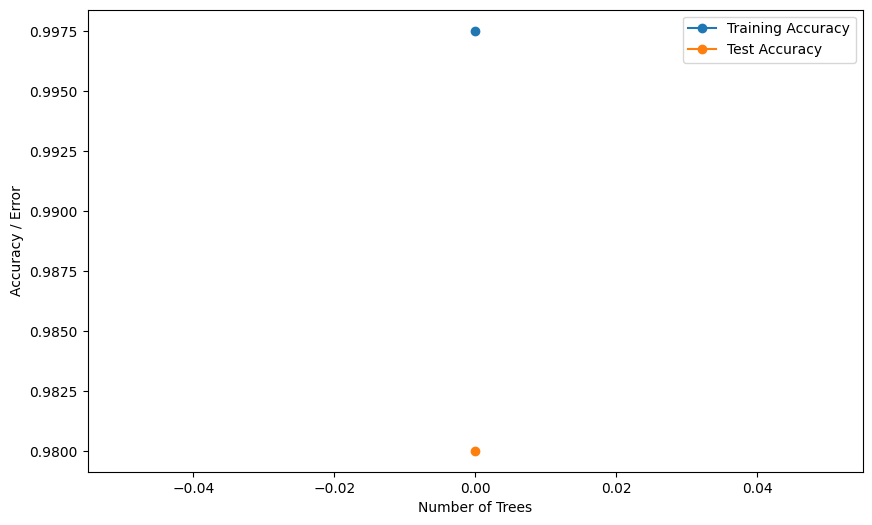

In [19]:
# Calculate the training and test accuracies
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)



# Print the training and test accuracies
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Plotting the training vs. test accuracy and OOB error graph
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, label='Training Accuracy', marker='o')
plt.plot(test_accuracy, label='Test Accuracy', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy / Error')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           N       0.94      0.94      0.94        18
           P       1.00      1.00      1.00        13
           Y       0.99      0.99      0.99       168
          Y        0.00      0.00      0.00         1

    accuracy                           0.98       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.98      0.98      0.98       200

Confusion Matrix:
[[ 17   0   1   0]
 [  0  13   0   0]
 [  1   0 166   1]
 [  0   0   1   0]]


In [21]:
# Extract precision, recall, and f1-score from the report
report_dict = classification_report(y_test, y_pred, output_dict=True)
precision = report_dict['weighted avg']['precision']
recall = report_dict['weighted avg']['recall']
f1_score = report_dict['weighted avg']['f1-score']

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Precision: 0.98
Recall: 0.98
F1-Score: 0.98


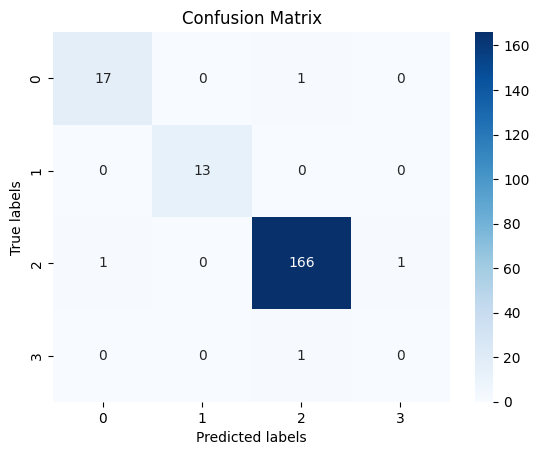

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [23]:
from sklearn.metrics import accuracy_score


In [24]:
print(accuracy_score(y_test, model.predict(X_test))*100)

98.0


In [25]:
import pickle

In [26]:
pickle.dump(model, open("diabetes.pkl",'wb'))